# Checkpoint 1

Reminder:

- You are being evaluated for completion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@".

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [ ]:
# load the dataset from google lab
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('states_edu.csv')
df.head()

Saving states_edu.csv to states_edu.csv


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 8 Math*

How many years of data are logged in our dataset?

In [ ]:
# @@@ 1
# Your Code
df["YEAR"].nunique()

# Answer: 33

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [ ]:
# @@@ 2
df.groupby("STATE")["AVG_MATH_8_SCORE"].mean().loc[["MICHIGAN", "OHIO"]]

# Answer: Ohio has a higher average (282.25), compared to Michigan (276.167), regarding Math score on Grade 8.


,AVG_MATH_8_SCORE
STATE,
MICHIGAN,276.166667
OHIO,282.250000


Find the average for your chosen test across all states in 2019

In [ ]:
# @@@ 3
# boolean condition: "YEAR" == 2019
condition = df["YEAR"] == 2019

# select rows which evaluates to TRUE
df[condition]

# find average of "AVG_MATH_8_score"
df[condition]["AVG_MATH_8_SCORE"].mean()

# Answer: 281.26415

np.float64(281.2641509433962)

For each state, find a maximum value for your chosen test score

In [ ]:
# @@@ 4

df.groupby("STATE")["AVG_MATH_8_SCORE"].max()

,AVG_MATH_8_SCORE
STATE,
ALABAMA,269.0
ALASKA,283.0
ARIZONA,283.0
ARKANSAS,279.0
CALIFORNIA,277.0
COLORADO,292.0
CONNECTICUT,289.0
DELAWARE,284.0
DISTRICT_OF_COLUMBIA,269.0


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [ ]:
# @@@ 5
# drop missing NA values
df.dropna(subset = ["INSTRUCTION_EXPENDITURE"],inplace = True)
df.dropna(subset = ["GRADES_ALL_G"],inplace = True)
df["Instruction_Expenditure_Per_student"] = df["INSTRUCTION_EXPENDITURE"] / df["GRADES_ALL_G"]
df["Instruction_Expenditure_Per_student"]

,Instruction_Expenditure_Per_student
0,2.025197
1,4.068693
2,2.132082
3,2.184247
4,2.732512
...,...
1270,6.949832
1271,6.433053
1272,6.588286
1273,6.663819


Feature engineering justification: **<create a new column that represents instruction expenditure per student\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Average Math 8 Score')

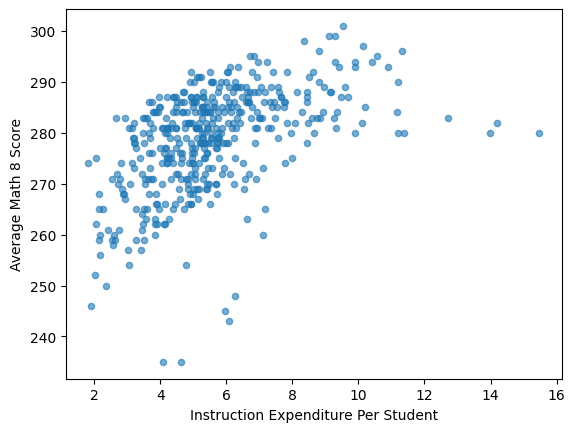

In [ ]:
# @@@ 6
df.plot.scatter(x="Instruction_Expenditure_Per_student",y="AVG_MATH_8_SCORE",alpha = 0.6)
plt.xlabel("Instruction Expenditure Per Student")
plt.ylabel("Average Math 8 Score")


**From the scatter plot, we can observe that "Average Math 8 Score" tends to increase as "Instruction Expenditure Per Student" rises, suggesting a positive relationship between financial investment and student performance. It makes sense, because when spending more financial costs on education, it's more likely to obtain a higher education quality, thus receiving a higher grade. There are some outliers which don't follow the general pattern, possible reasons could be socialeconomic backgrounds of students and different state education policies.**

**Visualization 2**

Text(0, 0.5, 'Average Math 8 Score')

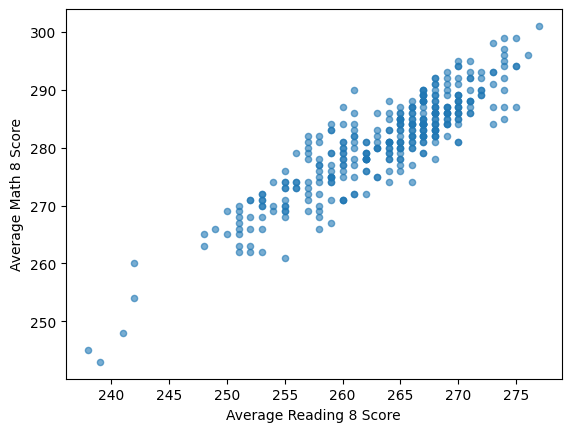

In [ ]:
# @@@ 7
df.plot.scatter(x="AVG_READING_8_SCORE",y="AVG_MATH_8_SCORE",alpha = 0.6)
plt.xlabel("Average Reading 8 Score")
plt.ylabel("Average Math 8 Score")

**From the scatter plot, we can observe that the "Average Math 8 Score" tends to increase as the "Average Reading 8 Score" rises, suggesting a strong positive relationship between reading and math performance. It makes sense, because students who develop stronger reading comprehension skills are often better prepared to understand math problems, which frequently involve word-based contexts. There are some outliers that don’t follow the general pattern, and possible reasons could be differences in teaching emphasis, student demographics, or variations in state-level curriculum standards.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [1]:
from sklearn.model_selection import train_test_split

In [ ]:
# @@@ 8

# X =
# y =

In [ ]:
# @@@ 9

# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [ ]:
# @@@ 10
# import your sklearn class here


In [ ]:
# @@@ 11
# create your model here
# model =

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [ ]:
# @@@ 12


We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [ ]:
# @@@ 13

# col_name = 'COLUMN NAME OF ONE PREDICTOR'


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior On Training Set")

In [ ]:
# @@@ 14


# col_name = 'COLUMN NAME OF ONE PREDICTOR"


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")